## [2] A Convolutional Neural Network for Gender Recognition Optimizing the Accuracy/Speed Tradeoff

First we need to import used libraries:

In [7]:
import tensorflow as tf, matplotlib.pyplot as plt, numpy as np, os
from keras.utils import plot_model
from helper.prepare_data import prepare_data

First, we pick the dataset that we would like to use from:
<br>1 - Age, gender, ethnicity CSV
<br>2 - UTKFace
<br>3 - Fairface

In [8]:
choice = 2

Prepare data from each dataset so that we end up with normalized pixels and labels:

In [9]:
x, y_age, y_gender, y_ethnicity, img_size = prepare_data(choice = choice)

Display some exemplary images:

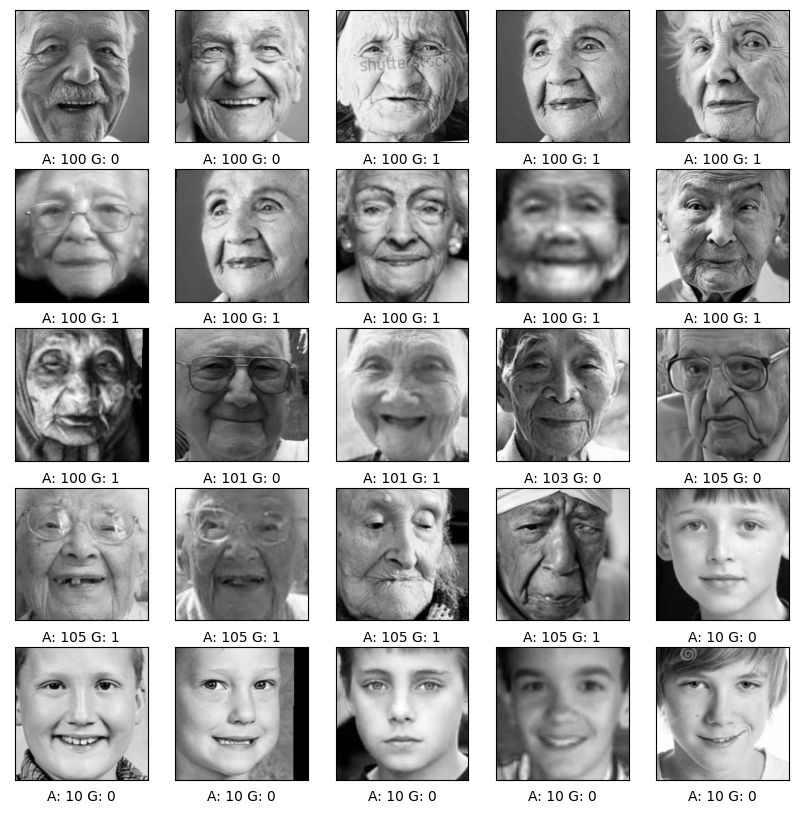

In [10]:
# size of the whole grid of images
plt.figure(figsize=(10, 10))

# display first 25 images in a 5x5 grid
for i in range(0, 25):
    plt.subplot(5, 5, (i % 25) + 1)
    plt.grid(False)
    #disable x and y axis description
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i].reshape(img_size, img_size), cmap='gray')
    # A = age, G = gender, E = ethnicity
    plt.xlabel("A: "+ str(y_age[i]) + " G: " + str(y_gender[i]) + (" E: " + str(y_ethnicity[i]) if y_ethnicity.size > 0 else ""))
plt.show()

MobileNet implementation:

In [11]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (img_size, img_size, 3), include_top = False, weights = 'imagenet')
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
gender_prediction_layer = tf.keras.layers.Dense(1, activation = 'sigmoid')
age_prediction_layer = tf.keras.layers.Dense(1, activation = 'relu')

model_gender = tf.keras.Sequential([
  base_model,
  global_average_layer,
  gender_prediction_layer
])

model_gender.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy', 'mae'])
model_gender.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [12]:
model_age = tf.keras.Sequential([
  base_model,
  global_average_layer,
  age_prediction_layer
])

model_age.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), loss = 'mse', metrics = ['accuracy', 'mae'])
model_age.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


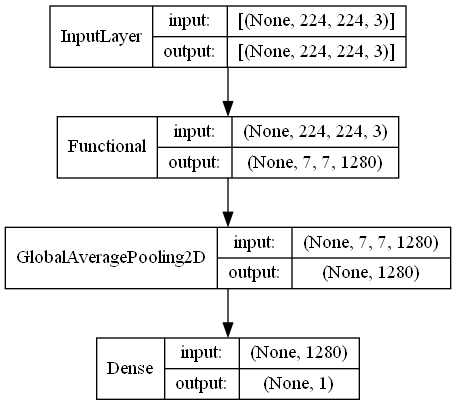

In [13]:
plot_model(model_gender, to_file = os.getcwd() + '//images//models//mobilenetv2_model.png', show_shapes = True, show_dtype = False, show_layer_names = False, rankdir = 'TB', expand_nested = False, dpi = 96)

In [ ]:
history = model_gender.fit(x, y_gender, epochs = 20, validation_split = 0.2)

Epoch 1/10
274/274 [==============================] - 187s 669ms/step - loss: 0.7316 - accuracy: 0.5078 - mae: 0.4971 - val_loss: 0.7199 - val_accuracy: 0.4952 - val_mae: 0.5018
Epoch 2/10
274/274 [==============================] - 151s 549ms/step - loss: 0.7110 - accuracy: 0.5206 - mae: 0.4923 - val_loss: 0.7520 - val_accuracy: 0.4925 - val_mae: 0.5044
Epoch 3/10
274/274 [==============================] - 153s 557ms/step - loss: 0.6998 - accuracy: 0.5467 - mae: 0.4862 - val_loss: 0.7964 - val_accuracy: 0.5112 - val_mae: 0.4952
Epoch 4/10
274/274 [==============================] - 147s 535ms/step - loss: 0.6940 - accuracy: 0.5492 - mae: 0.4837 - val_loss: 0.7224 - val_accuracy: 0.5071 - val_mae: 0.4972
Epoch 5/10
274/274 [==============================] - 149s 543ms/step - loss: 0.6882 - accuracy: 0.5619 - mae: 0.4810 - val_loss: 0.7160 - val_accuracy: 0.5011 - val_mae: 0.4981
Epoch 6/10
274/274 [==============================] - 151s 550ms/step - loss: 0.6842 - accuracy: 0.5615 - mae:

In [ ]:
age_acc = history.history['mae']
age_val_acc = history.history['val_mae']
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Mean Absolute Error')
plt.plot(epochs, age_val_acc, 'r', label='Validation Mean Absolute Error')
plt.title('Gender Mean Absolute Error Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.figure()

plt.savefig(os.getcwd() + '//images//plots//mobilenet_gender_mae_ds_' + str(choice))

KeyboardInterrupt: 

Exception ignored in: '_pydevd_frame_eval.pydevd_frame_evaluator.get_bytecode_while_frame_eval_39'
Traceback (most recent call last):
  File "_pydevd_frame_eval/pydevd_frame_evaluator.pyx", line 258, in _pydevd_frame_eval.pydevd_frame_evaluator.get_func_code_info
  File "c:\Python\lib\site-packages\debugpy\_vendored\pydevd\pydevd_file_utils.py", line 885, in get_abs_path_real_path_and_base_from_frame
    ret = get_abs_path_real_path_and_base_from_file(f)
  File "c:\Python\lib\site-packages\debugpy\_vendored\pydevd\pydevd_file_utils.py", line 852, in get_abs_path_real_path_and_base_from_file
    abs_path, canonical_normalized_filename = _abs_and_canonical_path(f)
  File "c:\Python\lib\site-packages\debugpy\_vendored\pydevd\pydevd_file_utils.py", line 411, in _abs_and_canonical_path
    real_path = _apply_func_and_normalize_case(filename, os_path_real_path, isabs, normalize)
  File "c:\Python\lib\site-packages\debugpy\_vendored\pydevd\pydevd_file_utils.py", line 438, in _apply_func_and_n

SystemError: <function _validate_hatch_pattern at 0x0000024BA6B24AF0> returned NULL without setting an exception

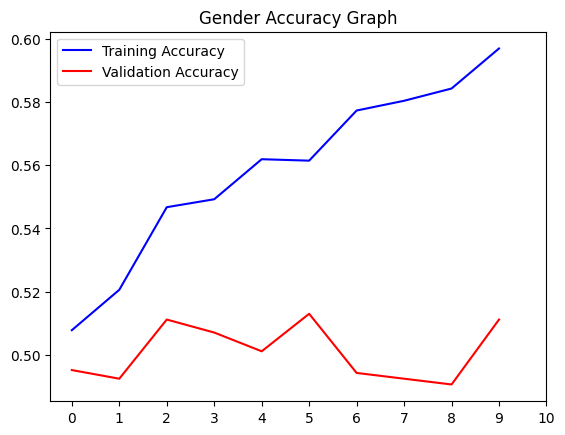

<Figure size 640x480 with 0 Axes>

In [ ]:
age_acc = history.history['accuracy']
age_val_acc = history.history['val_accuracy']
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Accuracy')
plt.plot(epochs, age_val_acc, 'r', label='Validation Accuracy')
plt.title('Gender Accuracy Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.figure()

plt.savefig(os.getcwd() + '//images//plots//mobilenet_gender_accuracy_ds_' + str(choice))